In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_data = pd.read_csv(r"C:\Vehical Price\Mobile Price\train.csv")
test_data = pd.read_csv(r"C:\Vehical Price\Mobile Price\test.csv")

In [3]:
print("\nTrain Data Head:\n", train_data.head())
print("\nTest Data Head:\n", test_data.head())


Train Data Head:
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_s

In [4]:
print("\nTrain Info:")
print(train_data.info())
print("\nTest Info:")
print(test_data.info())


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  


In [5]:
print("\nTrain Description:\n", train_data.describe())
print("\nTest Description:\n", test_data.describe())


Train Description:
        battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...

In [6]:
print("\nMissing values in Train:\n", train_data.isnull().sum())
print("\nMissing values in Test:\n", test_data.isnull().sum())


Missing values in Train:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Missing values in Test:
 id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2410876097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=train_data, palette='viridis')


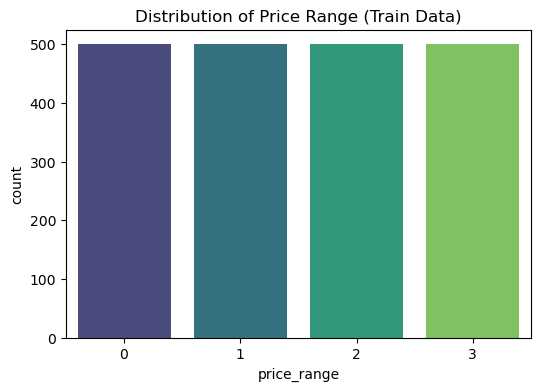

In [7]:
if "price_range" in train_data.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='price_range', data=train_data, palette='viridis')
    plt.title("Distribution of Price Range (Train Data)")
    plt.show()

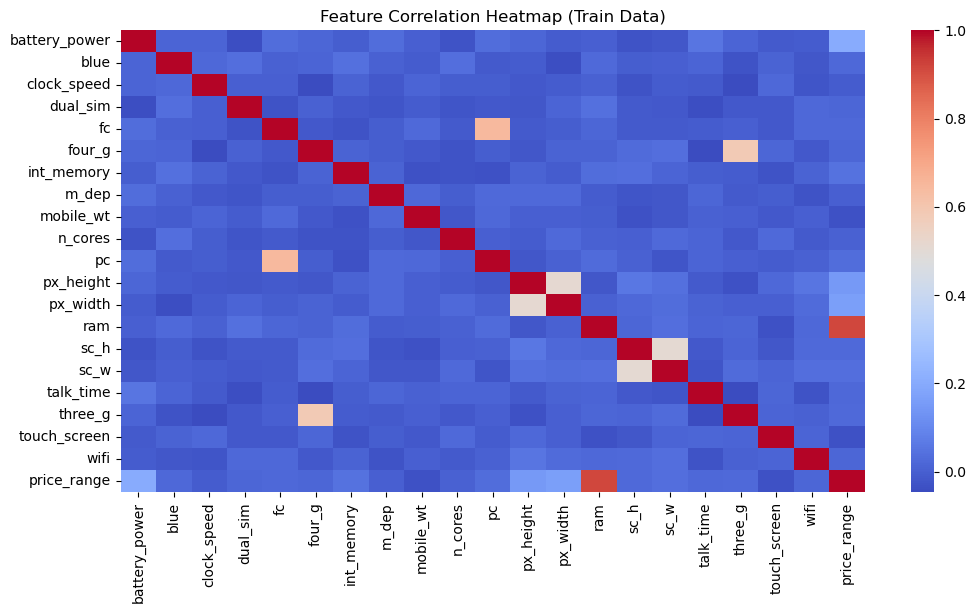

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(train_data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap (Train Data)")
plt.show()

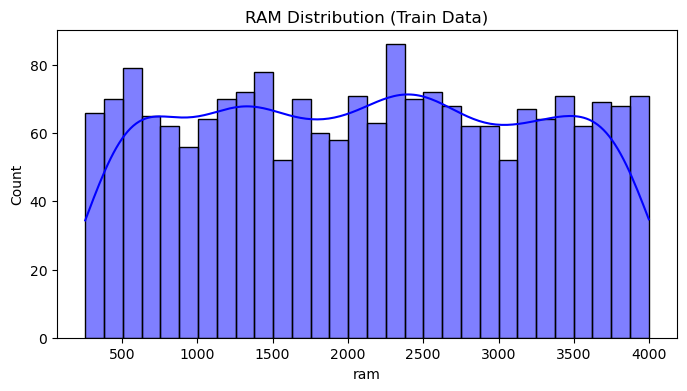

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(train_data['ram'], bins=30, kde=True, color="blue")
plt.title("RAM Distribution (Train Data)")
plt.show()

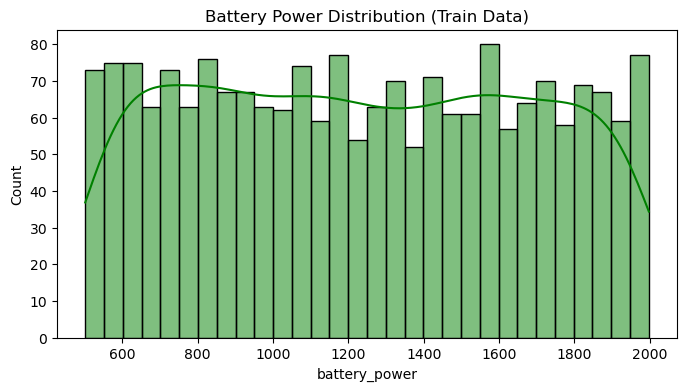

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(train_data['battery_power'], bins=30, kde=True, color="green")
plt.title("Battery Power Distribution (Train Data)")
plt.show()

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\1414747581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=train_data, palette='Set2')


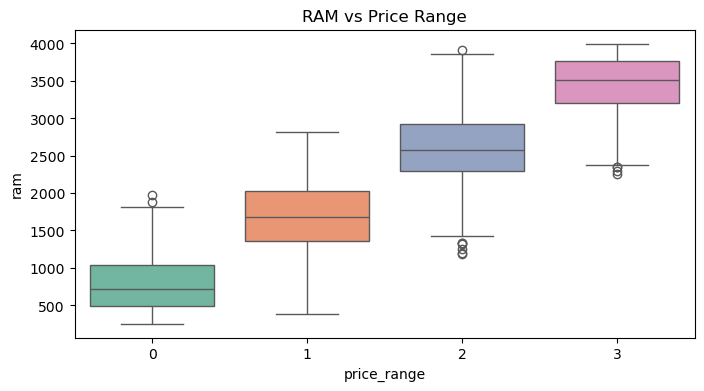

In [11]:
if "price_range" in train_data.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='price_range', y='ram', data=train_data, palette='Set2')
    plt.title("RAM vs Price Range")
    plt.show()

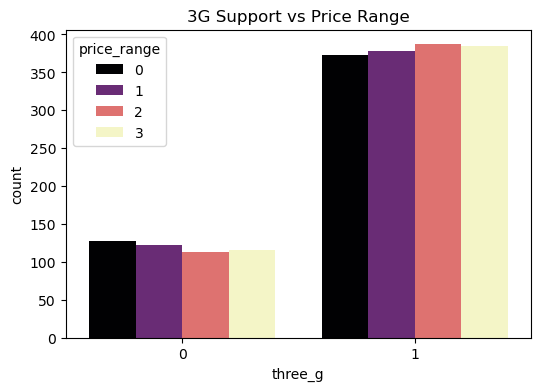

In [12]:
    plt.figure(figsize=(6,4))
    sns.countplot(x='three_g', hue='price_range', data=train_data, palette='magma')
    plt.title("3G Support vs Price Range")
    plt.show()

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label="Train", shade=True)
C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label="Test", shade=True)


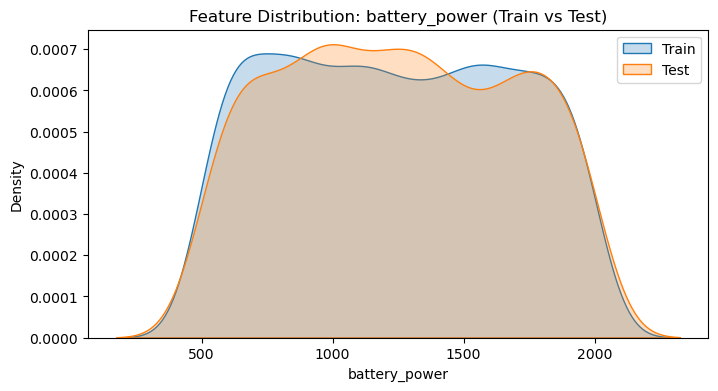

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label="Train", shade=True)
C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label="Test", shade=True)


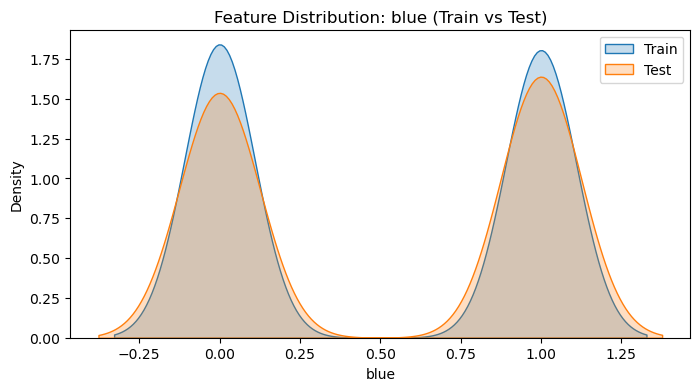

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label="Train", shade=True)
C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label="Test", shade=True)


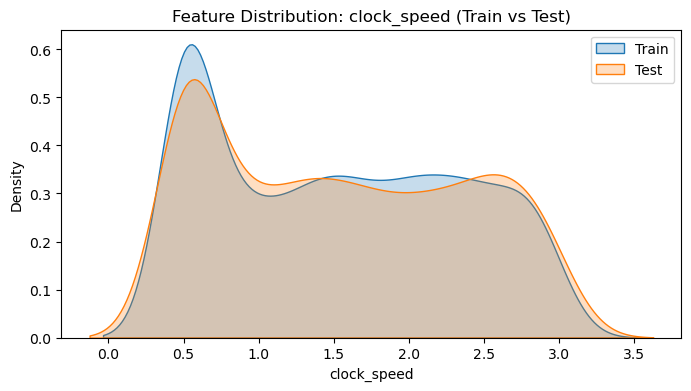

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label="Train", shade=True)
C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label="Test", shade=True)


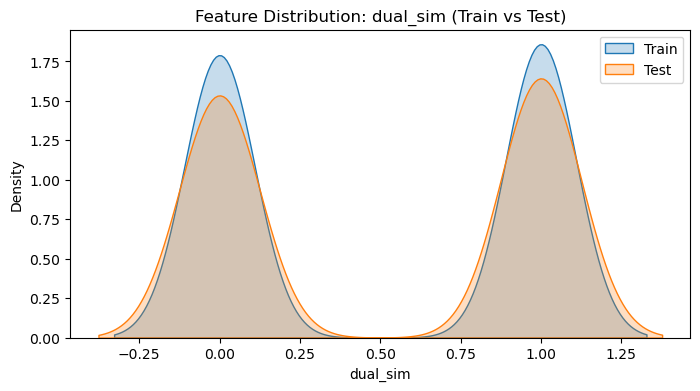

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[col], label="Train", shade=True)
C:\Users\Yogesh\AppData\Local\Temp\ipykernel_6456\2584266252.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_data[col], label="Test", shade=True)


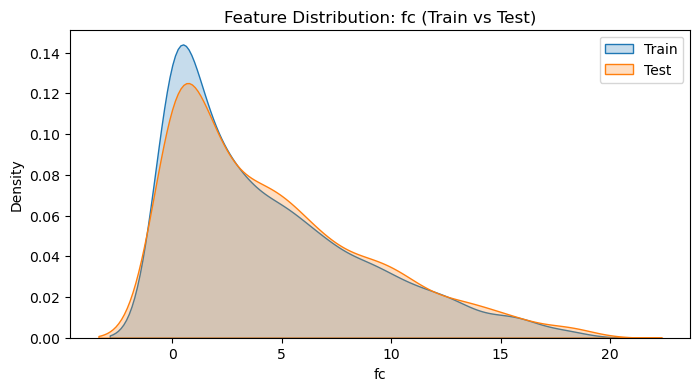

In [13]:
common_cols = [col for col in train_data.columns if col in test_data.columns]

for col in common_cols[:5]: 
    plt.figure(figsize=(8,4))
    sns.kdeplot(train_data[col], label="Train", shade=True)
    sns.kdeplot(test_data[col], label="Test", shade=True)
    plt.title(f"Feature Distribution: {col} (Train vs Test)")
    plt.legend()
    plt.show()

In [ ]:
if "price_range" in train_data.columns:
    X = train_data.drop("price_range", axis=1)
    y = train_data["price_range"]

    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh', color="skyblue")
    plt.title("Top 10 Important Features (Train Data)")
    plt.show()

In [ ]:
X = train_data.drop("price_range", axis=1)
y = train_data["price_range"]


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

In [ ]:
# Initialize model
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

In [ ]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation Accuracy:", cv_scores.mean())

In [ ]:
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='auto')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)

In [ ]:
print("🔹 Logistic Regression Results 🔹")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
X_test = test_data.drop(columns=['id'], errors='ignore')

test_predictions = log_reg.predict(X_test)

submission_log = pd.DataFrame({
    "id": test_data.index,  # or test_data['id'] if exists
    "price_range": test_predictions
})
submission_log.to_csv("submission_logistic.csv", index=False)
print(" Logistic Regression submission saved successfully")

In [ ]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_val)


print("🔹 SVM Results 🔹")
print("Accuracy:", accuracy_score(y_val, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_val, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))

X_test = test_data.drop(columns=['id'], errors='ignore')

test_predictions_svm = svm_model.predict(X_test)

submission_svm = pd.DataFrame({
    "id": test_data.index, 
    "price_range": test_predictions_svm
})
submission_svm.to_csv("submission_svm.csv", index=False)
print("✅ SVM submission saved successfully")

In [ ]:
model_results = {
    "Logistic Regression": accuracy_score(y_val, y_pred),
    "SVM": accuracy_score(y_val, y_pred_svm)
}

plt.figure(figsize=(6,4))
plt.bar(model_results.keys(), model_results.values(), color=["orange","green"])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters for SVM:", grid.best_params_)
print("Best CV Accuracy for SVM:", grid.best_score_)

best_svm = grid.best_estimator_
best_svm.fit(X, y) 